In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import svm
from sklearn import neural_network
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 100)

In [21]:
df = pd.read_csv('data/CollectionDatasets/House_Price.csv', encoding='utf-8')
df

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,NO,9.348,12.1792,Lake and River,27,YES,0.056006
502,20.6,0.04527,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,YES,6.612,13.1648,Lake and River,20,YES,0.059903
503,23.9,0.06076,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,NO,5.478,12.1912,None,31,YES,0.057572
504,22.0,0.10959,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,YES,7.940,15.1760,None,47,YES,0.060694


In [22]:
df.isna().sum()

price          0
crime_rate     0
resid_area     0
air_qual       0
room_num       0
age            0
dist1          0
dist2          0
dist3          0
dist4          0
teachers       0
poor_prop      0
airport        0
n_hos_beds     8
n_hot_rooms    0
waterbody      0
rainfall       0
bus_ter        0
parks          0
dtype: int64

In [23]:
df = df[~df['n_hos_beds'].isna()]

In [24]:
df.dtypes

price          float64
crime_rate     float64
resid_area     float64
air_qual       float64
room_num       float64
age            float64
dist1          float64
dist2          float64
dist3          float64
dist4          float64
teachers       float64
poor_prop      float64
airport         object
n_hos_beds     float64
n_hot_rooms    float64
waterbody       object
rainfall         int64
bus_ter         object
parks          float64
dtype: object

In [25]:
df['airport'].unique()

array(['YES', 'NO'], dtype=object)

In [26]:
df['waterbody'].unique()

array(['River', 'Lake', 'None', 'Lake and River'], dtype=object)

In [27]:
df['bus_ter'].unique()

array(['YES'], dtype=object)

In [30]:
df['river'] = df['waterbody'].str.contains('River').astype('uint8')
df['lake'] = df['waterbody'].str.contains('Lake').astype('uint8')
df['airport'] = df['airport'].str.contains('YES').astype('uint8')
df = df.drop(['bus_ter', 'waterbody'], axis=1)

In [33]:
df

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,rainfall,parks,river,lake
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,1,5.480,11.1920,23,0.049347,1,0
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,0,7.332,12.1728,42,0.046146,0,1
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,0,7.394,101.1200,38,0.045764,0,0
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,1,9.268,11.2672,45,0.047151,0,1
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,0,8.824,11.2896,55,0.039474,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,0,9.348,12.1792,27,0.056006,1,1
502,20.6,0.04527,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,1,6.612,13.1648,20,0.059903,1,1
503,23.9,0.06076,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,0,5.478,12.1912,31,0.057572,0,0
504,22.0,0.10959,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,1,7.940,15.1760,47,0.060694,0,0


<AxesSubplot:>

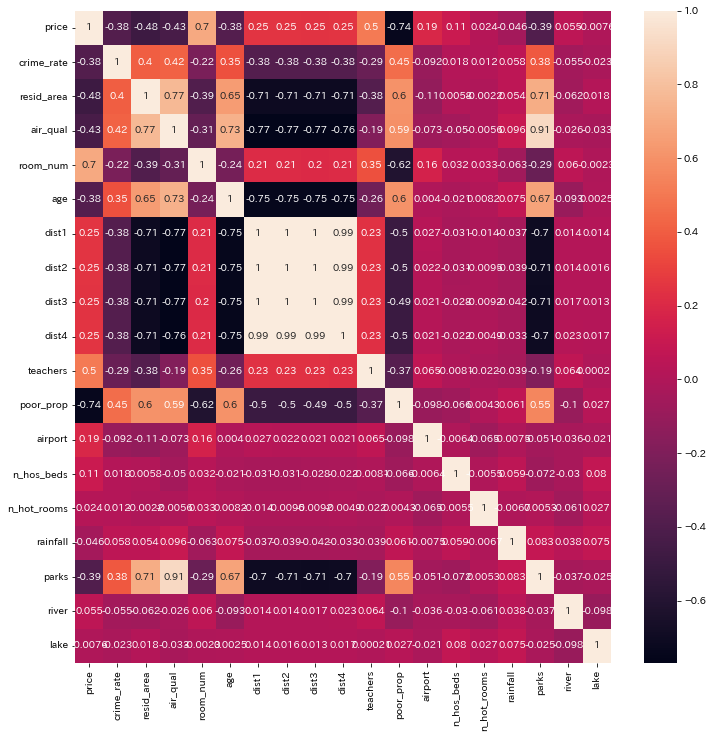

In [37]:
plt.figure(figsize=(12.0,12.0))
sns.heatmap(df.corr(), annot=True)

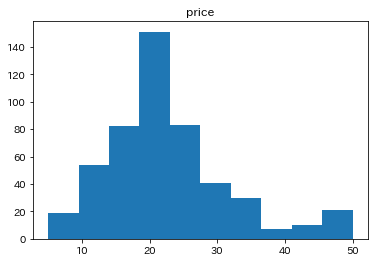

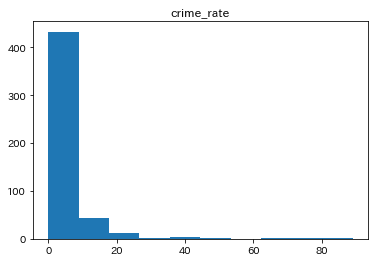

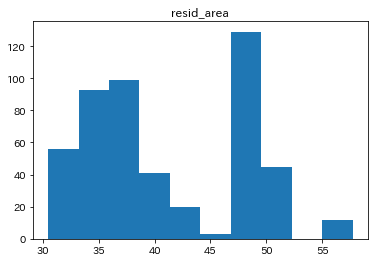

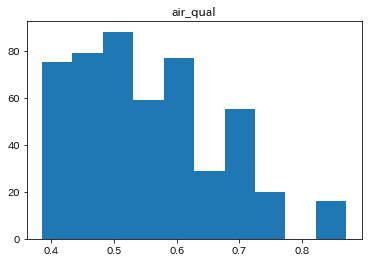

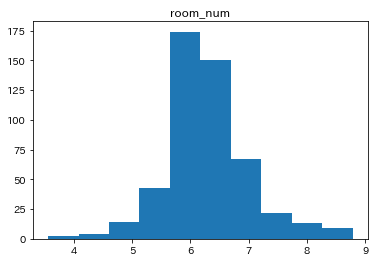

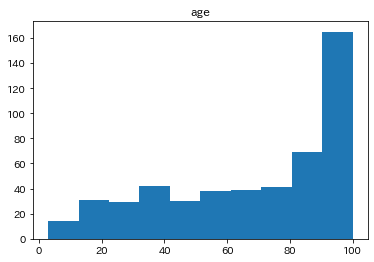

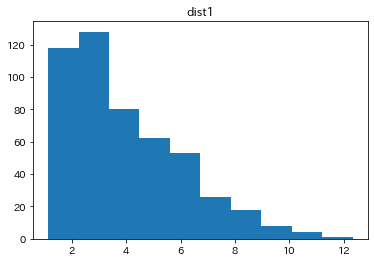

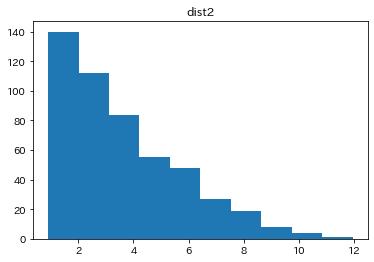

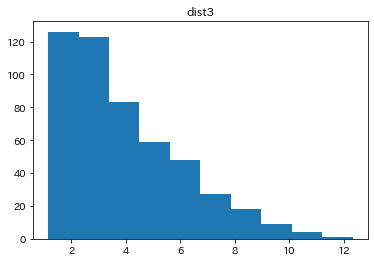

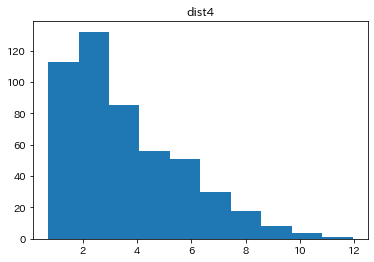

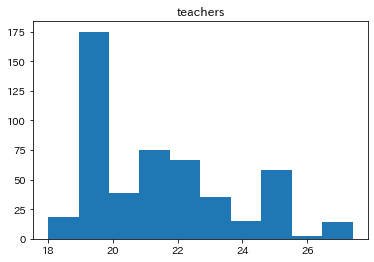

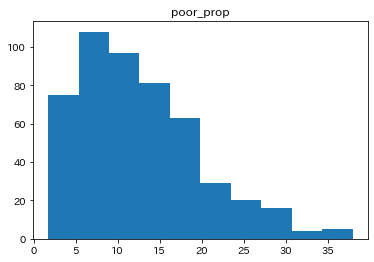

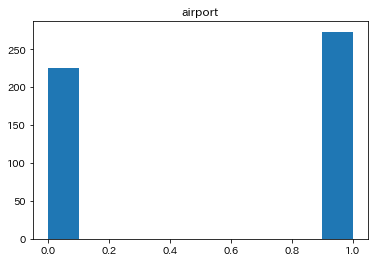

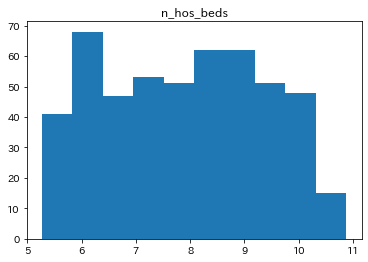

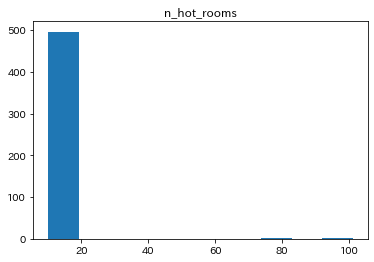

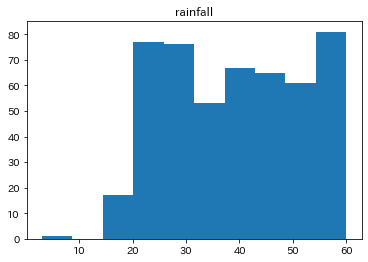

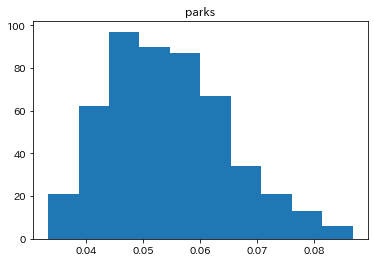

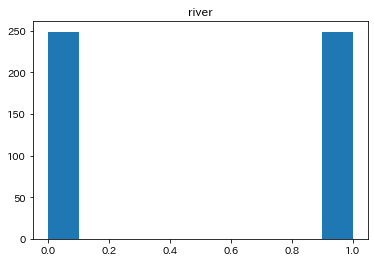

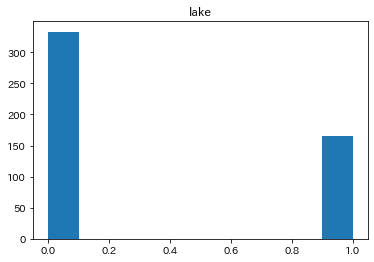

In [40]:
for col in df.columns:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [42]:
df.columns

Index(['price', 'crime_rate', 'resid_area', 'air_qual', 'room_num', 'age',
       'dist1', 'dist2', 'dist3', 'dist4', 'teachers', 'poor_prop', 'airport',
       'n_hos_beds', 'n_hot_rooms', 'rainfall', 'parks', 'river', 'lake'],
      dtype='object')

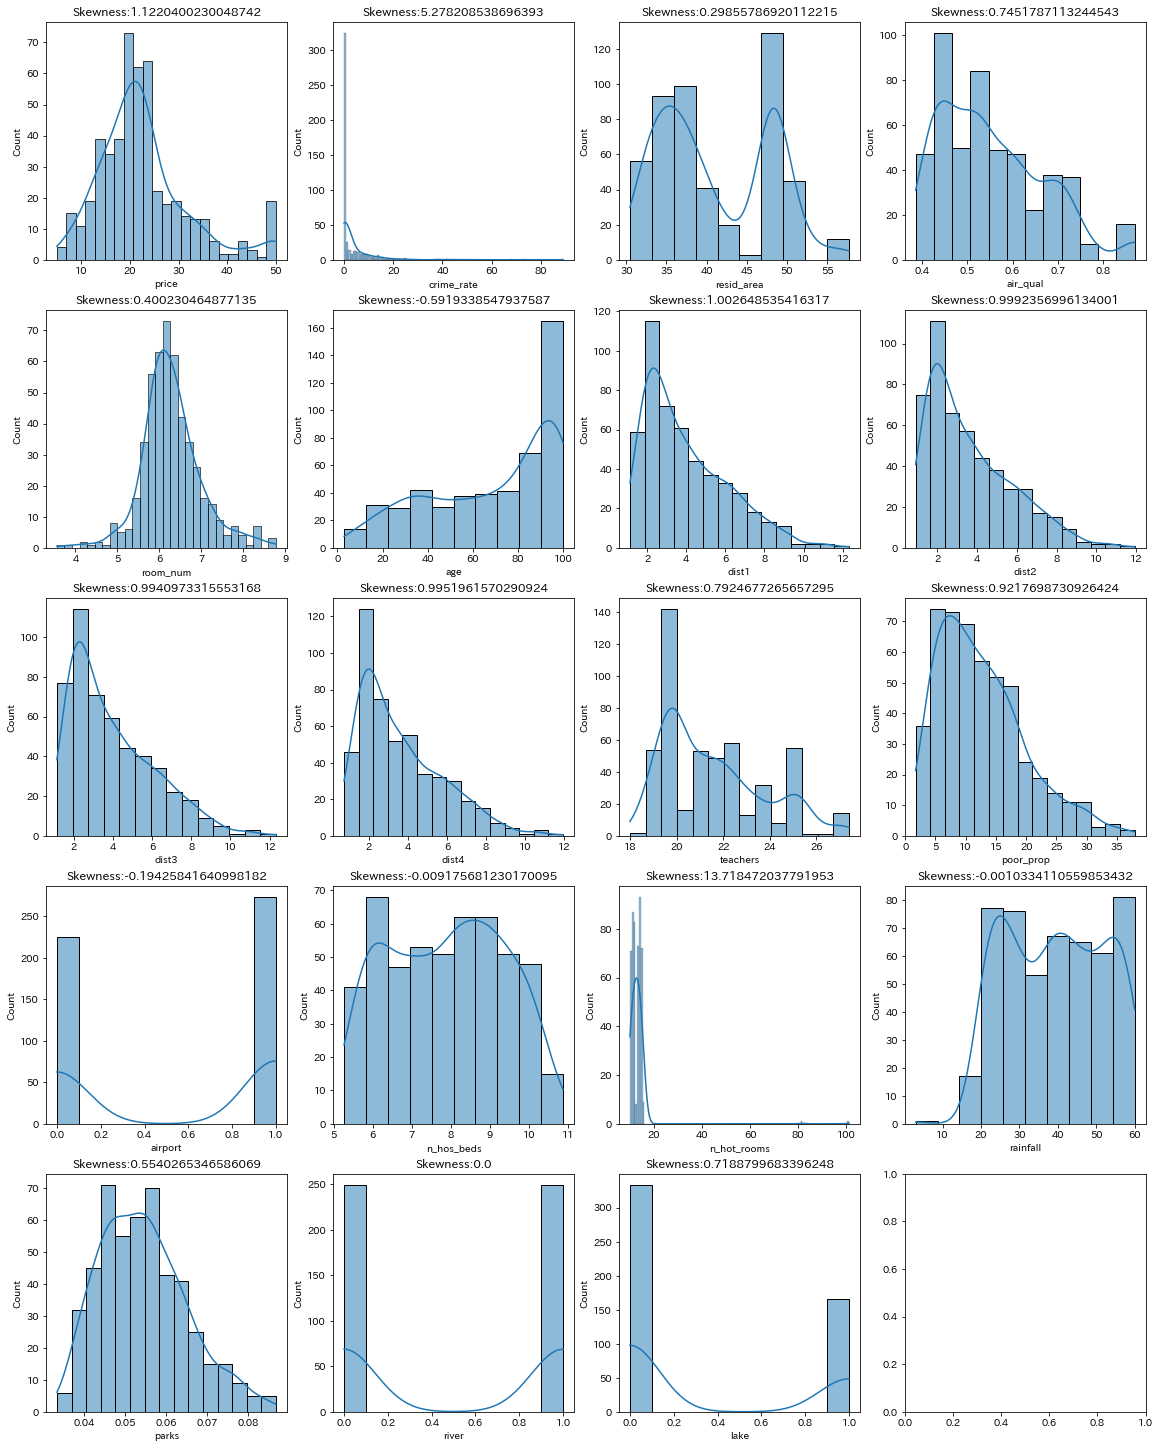

In [44]:
fig,ax=plt.subplots(5,4, figsize=(16,20),constrained_layout=True)
ax=ax.ravel()

for index, col in enumerate(df.columns):
    sns.histplot(x=col,data=df,ax=ax[index],
               kde=True)
    ax[index].set_title(f'Skewness:{df[col].skew(axis = 0)}')

In [45]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
print(X_train.shape)
print(X_test.shape)

(398, 18)
(100, 18)


In [46]:
models = [linear_model.LinearRegression(),
          neighbors.KNeighborsRegressor(),
          svm.SVR(),
          neural_network.MLPRegressor(),
          tree.DecisionTreeRegressor(max_depth=3),
          ensemble.RandomForestRegressor(max_depth=3),
          ensemble.GradientBoostingRegressor(n_estimators=100)]

In [47]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['決定係数(訓練)'] = metrics.r2_score(y_train, y_pred)
    dic['平均絶対誤差(訓練)'] = metrics.mean_absolute_error(y_train, y_pred)
    dic['平均二乗誤差(訓練)'] = metrics.mean_squared_error(y_train, y_pred)
    dic['二乗平均平方根誤差(訓練)'] = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
    y_pred = model.predict(X_test)
    dic['決定係数(テスト)'] = metrics.r2_score(y_test, y_pred)
    dic['平均絶対誤差(テスト)'] = metrics.mean_absolute_error(y_test, y_pred)
    dic['平均二乗誤差(テスト)'] = metrics.mean_squared_error(y_test, y_pred)
    dic['二乗平均平方根誤差(テスト)'] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp

C:\Users\ishih\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,モデル名,決定係数(訓練),平均絶対誤差(訓練),平均二乗誤差(訓練),二乗平均平方根誤差(訓練),決定係数(テスト),平均絶対誤差(テスト),平均二乗誤差(テスト),二乗平均平方根誤差(テスト)
0,LinearRegression,0.719094,3.539620,24.946424,4.994640,0.737100,3.207819,17.437019,4.175766
1,KNeighborsRegressor,0.709805,3.340050,25.771334,5.076547,0.573168,3.798000,28.309920,5.320707
2,SVR,0.315077,4.834900,60.825956,7.799100,0.287201,4.311851,47.276891,6.875819
3,MLPRegressor,0.753578,3.412567,21.883953,4.678029,0.714172,3.242019,18.957774,4.354053
4,DecisionTreeRegressor,0.832292,2.908590,14.893680,3.859233,0.796672,3.011787,13.485898,3.672315
5,RandomForestRegressor,0.886370,2.456621,10.091101,3.176649,0.805321,2.738258,12.912196,3.593354
6,GradientBoostingRegressor,0.982947,0.999960,1.514464,1.230636,0.890046,1.984772,7.292770,2.700513


In [48]:
X_train.dtypes[0]

dtype('float64')

In [50]:
[x for x in X_train.dtypes.index if X_train.dtypes[x] != 'uint8']

['crime_rate',
 'resid_area',
 'air_qual',
 'room_num',
 'age',
 'dist1',
 'dist2',
 'dist3',
 'dist4',
 'teachers',
 'poor_prop',
 'n_hos_beds',
 'n_hot_rooms',
 'rainfall',
 'parks']

In [51]:
from sklearn.preprocessing import StandardScaler

scaling_columns = [x for x in X_train.dtypes.index if X_train.dtypes[x] != 'uint8']
scaler = StandardScaler().fit(X_train[scaling_columns])

scaled_train = pd.DataFrame(scaler.transform(X_train[scaling_columns]), columns=scaling_columns, index=X_train.index)
X_train.update(scaled_train)

scaled_test = pd.DataFrame(scaler.transform(X_test[scaling_columns]), columns=scaling_columns, index=X_test.index)
X_test.update(scaled_test)

In [52]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['決定係数(訓練)'] = metrics.r2_score(y_train, y_pred)
    dic['平均絶対誤差(訓練)'] = metrics.mean_absolute_error(y_train, y_pred)
    dic['平均二乗誤差(訓練)'] = metrics.mean_squared_error(y_train, y_pred)
    dic['二乗平均平方根誤差(訓練)'] = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
    y_pred = model.predict(X_test)
    dic['決定係数(テスト)'] = metrics.r2_score(y_test, y_pred)
    dic['平均絶対誤差(テスト)'] = metrics.mean_absolute_error(y_test, y_pred)
    dic['平均二乗誤差(テスト)'] = metrics.mean_squared_error(y_test, y_pred)
    dic['二乗平均平方根誤差(テスト)'] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp

C:\Users\ishih\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,モデル名,決定係数(訓練),平均絶対誤差(訓練),平均二乗誤差(訓練),二乗平均平方根誤差(訓練),決定係数(テスト),平均絶対誤差(テスト),平均二乗誤差(テスト),二乗平均平方根誤差(テスト)
0,LinearRegression,0.719094,3.539620,24.946424,4.994640,0.737100,3.207819,17.437019,4.175766
1,KNeighborsRegressor,0.827126,2.596784,15.352374,3.918211,0.793797,2.611000,13.676564,3.698184
2,SVR,0.673965,3.152992,28.954215,5.380912,0.666142,2.718447,22.143392,4.705677
3,MLPRegressor,0.627463,4.364362,33.083841,5.751855,0.485037,4.611441,34.155265,5.844251
4,DecisionTreeRegressor,0.832292,2.908590,14.893680,3.859233,0.796672,3.011787,13.485898,3.672315
5,RandomForestRegressor,0.887922,2.458535,9.953329,3.154890,0.810155,2.730525,12.591590,3.548463
6,GradientBoostingRegressor,0.982947,0.999960,1.514464,1.230636,0.889395,1.994201,7.335939,2.708494


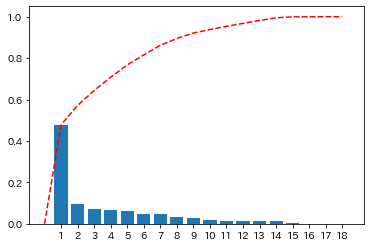

In [53]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)
ev_ratio = pca.explained_variance_ratio_
ev_ratio = np.hstack([0,ev_ratio.cumsum()])
plt.plot(ev_ratio, color='red', linestyle='dashed')
plt.xticks(range(1, X_train.shape[-1]+1))
plt.show()

In [54]:
n = 7
columns=[f'PC{i+1}' for i in range(n)]
X_train_pca = pd.DataFrame(X_train_pca[:,:n], columns=columns)
X_test_pca = pd.DataFrame(X_test_pca[:,:n], columns=columns)

In [55]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train_pca,y_train)
    y_pred = model.predict(X_train_pca)
    dic['決定係数(訓練)'] = metrics.r2_score(y_train, y_pred)
    dic['平均絶対誤差(訓練)'] = metrics.mean_absolute_error(y_train, y_pred)
    dic['平均二乗誤差(訓練)'] = metrics.mean_squared_error(y_train, y_pred)
    dic['二乗平均平方根誤差(訓練)'] = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
    y_pred = model.predict(X_test_pca)
    dic['決定係数(テスト)'] = metrics.r2_score(y_test, y_pred)
    dic['平均絶対誤差(テスト)'] = metrics.mean_absolute_error(y_test, y_pred)
    dic['平均二乗誤差(テスト)'] = metrics.mean_squared_error(y_test, y_pred)
    dic['二乗平均平方根誤差(テスト)'] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp

C:\Users\ishih\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,モデル名,決定係数(訓練),平均絶対誤差(訓練),平均二乗誤差(訓練),二乗平均平方根誤差(訓練),決定係数(テスト),平均絶対誤差(テスト),平均二乗誤差(テスト),二乗平均平方根誤差(テスト)
0,LinearRegression,0.701159,3.535436,26.539128,5.151614,0.750000,3.014189,16.581451,4.072033
1,KNeighborsRegressor,0.785420,2.824221,19.056233,4.365345,0.783001,2.745000,14.392636,3.793763
2,SVR,0.650944,3.391686,30.998625,5.567641,0.649349,2.862314,23.257185,4.822570
3,MLPRegressor,0.641059,4.207527,31.876442,5.645923,0.537791,4.318322,30.656311,5.536814
4,DecisionTreeRegressor,0.661912,4.073742,30.024530,5.479464,0.615648,3.653987,25.492428,5.049003
5,RandomForestRegressor,0.751256,3.284196,22.090230,4.700024,0.748344,3.171256,16.691244,4.085492
6,GradientBoostingRegressor,0.947682,1.621430,4.646204,2.155506,0.814929,2.543745,12.274986,3.503568


In [58]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
df2 = df.copy()
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
# NOTE: 数値型の列名をだけを`numerics2`という配列変数に代入
for i in df2.columns:
    if df2[i].dtype in numeric_dtypes:
        numerics2.append(i)

# NOTE: 各列のskewnessを計算して配列にした後、skewnessの大きい順にソートする
skew_features = df2[numerics2].skew(axis = 0).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

for i in skew_index:
    df2[i] = boxcox1p(df2[i], boxcox_normmax(df2[i] + 1))

In [59]:
X = df2.drop('price', axis=1)
y = df2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
print(X_train.shape)
print(X_test.shape)

(398, 18)
(100, 18)


In [60]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['決定係数(訓練)'] = metrics.r2_score(y_train, y_pred)
    dic['平均絶対誤差(訓練)'] = metrics.mean_absolute_error(y_train, y_pred)
    dic['平均二乗誤差(訓練)'] = metrics.mean_squared_error(y_train, y_pred)
    dic['二乗平均平方根誤差(訓練)'] = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
    y_pred = model.predict(X_test)
    dic['決定係数(テスト)'] = metrics.r2_score(y_test, y_pred)
    dic['平均絶対誤差(テスト)'] = metrics.mean_absolute_error(y_test, y_pred)
    dic['平均二乗誤差(テスト)'] = metrics.mean_squared_error(y_test, y_pred)
    dic['二乗平均平方根誤差(テスト)'] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp

C:\Users\ishih\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,モデル名,決定係数(訓練),平均絶対誤差(訓練),平均二乗誤差(訓練),二乗平均平方根誤差(訓練),決定係数(テスト),平均絶対誤差(テスト),平均二乗誤差(テスト),二乗平均平方根誤差(テスト)
0,LinearRegression,0.776801,0.206685,0.075907,0.275513,0.728491,0.228403,0.100686,0.317311
1,KNeighborsRegressor,0.484392,0.304987,0.175351,0.418750,0.351862,0.358602,0.240355,0.490260
2,SVR,0.323643,0.341617,0.230020,0.479604,0.454007,0.321095,0.202476,0.449973
3,MLPRegressor,0.534719,0.304810,0.158236,0.397789,0.539613,0.300168,0.170730,0.413194
4,DecisionTreeRegressor,0.820322,0.182080,0.061106,0.247196,0.681406,0.251066,0.118147,0.343726
5,RandomForestRegressor,0.864834,0.157819,0.045968,0.214402,0.778716,0.209474,0.082061,0.286463
6,GradientBoostingRegressor,0.979594,0.066279,0.006940,0.083306,0.837475,0.168478,0.060271,0.245501


In [61]:
scaling_columns = [x for x in X_train.dtypes.index if X_train.dtypes[x] != 'uint8']
scaler = StandardScaler().fit(X_train[scaling_columns])

scaled_train = pd.DataFrame(scaler.transform(X_train[scaling_columns]), columns=scaling_columns, index=X_train.index)
X_train.update(scaled_train)

scaled_test = pd.DataFrame(scaler.transform(X_test[scaling_columns]), columns=scaling_columns, index=X_test.index)
X_test.update(scaled_test)

In [62]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['決定係数(訓練)'] = metrics.r2_score(y_train, y_pred)
    dic['平均絶対誤差(訓練)'] = metrics.mean_absolute_error(y_train, y_pred)
    dic['平均二乗誤差(訓練)'] = metrics.mean_squared_error(y_train, y_pred)
    dic['二乗平均平方根誤差(訓練)'] = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
    y_pred = model.predict(X_test)
    dic['決定係数(テスト)'] = metrics.r2_score(y_test, y_pred)
    dic['平均絶対誤差(テスト)'] = metrics.mean_absolute_error(y_test, y_pred)
    dic['平均二乗誤差(テスト)'] = metrics.mean_squared_error(y_test, y_pred)
    dic['二乗平均平方根誤差(テスト)'] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp

C:\Users\ishih\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,モデル名,決定係数(訓練),平均絶対誤差(訓練),平均二乗誤差(訓練),二乗平均平方根誤差(訓練),決定係数(テスト),平均絶対誤差(テスト),平均二乗誤差(テスト),二乗平均平方根誤差(テスト)
0,LinearRegression,0.776801,0.206685,0.075907,0.275513,0.728491,0.228403,0.100686,0.317311
1,KNeighborsRegressor,0.831081,0.167925,0.057447,0.239682,0.743805,0.225599,0.095007,0.308232
2,SVR,0.928822,0.110296,0.024207,0.155585,0.814856,0.169835,0.068659,0.262028
3,MLPRegressor,0.363227,0.361292,0.216558,0.465358,-0.090491,0.520872,0.404397,0.635922
4,DecisionTreeRegressor,0.820322,0.182080,0.061106,0.247196,0.681406,0.251066,0.118147,0.343726
5,RandomForestRegressor,0.870582,0.155301,0.044013,0.209794,0.785084,0.203942,0.079699,0.282310
6,GradientBoostingRegressor,0.981135,0.063071,0.006416,0.080099,0.853962,0.161895,0.054157,0.232716
